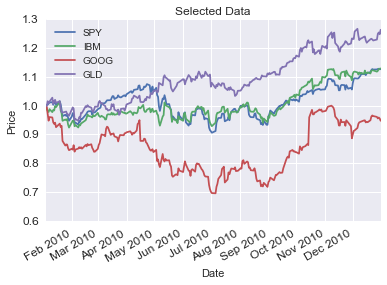

In [54]:
import os
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


def plot_selected(df, columns, start_index, end_index):
    """Plot the desired columns over index values in the given range."""
    plot_data(df.ix[start_index:end_index, columns], title="Selected Data")


def symbol_to_path(symbol, base_dir="data"):
    """Return CSV file path given ticker symbol."""
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))


def get_data(symbols, dates):
    """Read stock data (adjusted close) for given symbols from CSV files."""
    df = pd.DataFrame(index=dates)
    if 'SPY' not in symbols:  # add SPY for reference, if absent
        symbols.insert(0, 'SPY')

    for symbol in symbols:
        df_temp = pd.read_csv(symbol_to_path(symbol), index_col='Date',
                parse_dates=True, usecols=['Date', 'Adj Close'], na_values=['nan'])
        df_temp = df_temp.rename(columns={'Adj Close': symbol})
        df = df.join(df_temp)
        if symbol == 'SPY':  # drop dates SPY did not trade
            df = df.dropna(subset=["SPY"])

    return df

def normalize_data(df):
    """Returns a normalized dataframe using the first row of df"""
    return df/df.ix[0,:]


def plot_data(df, title="Stock prices", xlabel="Date", ylabel="Price"):
    """Plot stock prices with a custom title and meaningful axis labels."""
    ax = df.plot(title=title, fontsize=12)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.show()


def test_run():
    # Define a date range
    dates = pd.date_range('2010-01-01', '2010-12-31')

    # Choose stock symbols to read
    symbols = ['GOOG', 'IBM', 'GLD']  # SPY will be added in get_data()
    
    # Get stock data
    df = get_data(symbols, dates)

    # Slice and plot
    plot_selected(normalize_data(df), ['SPY', 'IBM','GOOG', 'GLD'], '2010-01-01', '2010-12-31')


if __name__ == "__main__":
    test_run()

In [25]:
def test_run():
    
    np.random.seed(142)
    a = np.random.randint(0,10, size=(5,4)) #5X4 matrix with random ints [0,10)
    print "Array: \n", a
    print
    
    #stats
    print "Min of each col: \n", a.min(axis=0)
    print
    print "Min of each row: \n", a.min(axis=1)
    print
    print "Mean of all els:", a.mean()


In [26]:
test_run()

Array: 
[[5 5 0 1]
 [2 7 4 7]
 [2 2 2 5]
 [7 2 4 3]
 [3 8 2 4]]

Min of each col: 
[2 2 0 1]

Min of each row: 
[0 2 2 2 2]

Mean of all els: 3.75


In [28]:
def get_max_index(a):
    """Returns the index of max value in a given array"""
    return a.argmax()

def get_min_index(a):
    """Returns the index of min value in a given array"""
    return a.argmin()

In [31]:
def test_time():
    t1 = time.time()
    print "Stay Stoked"
    t2 = time.time()
    print "Time elapsed is:", t2 - t1

In [40]:
#Masking example
def test_mask():
    a = np.array([(12,33,44,11,10,0,2,3,4,15), (1,2,3,4,6,10,33,0,7,8)])
    print a
    
    mean = a.mean()
    print mean
    
    a[a < mean] = mean
    print a
    
test_mask()

[[12 33 44 11 10  0  2  3  4 15]
 [ 1  2  3  4  6 10 33  0  7  8]]
10.4
[[12 33 44 11 10 10 10 10 10 15]
 [10 10 10 10 10 10 33 10 10 10]]


/Users/justinsimcock/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()
/Users/justinsimcock/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:9: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).std()


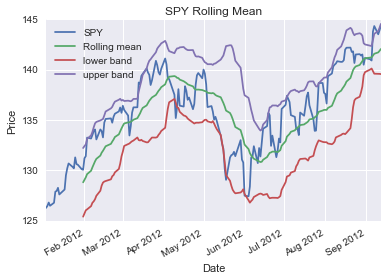

In [49]:
#rolling mean example

def test_rolling():
    dates = pd.date_range('2012-01-01', '2012-12-31')
    symbols = ['SPY']
    df = get_data(symbols, dates)
    
    ax = df['SPY'].plot(title='SPY Rolling Mean', label='SPY')
    
    rm_SPY = get_rolling_mean(df['SPY'], window=20)
    
    rstd_SPY = get_rolling_std(df['SPY'], window=20)
    
    upper_band, lower_band = get_bollinger_band(rm_SPY, rstd_SPY)

    
    rm_SPY.plot(label='Rolling mean', ax = ax)
    lower_band.plot(label='lower band', ax=ax)
    upper_band.plot(label='upper band', ax=ax)

    
    
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    ax.legend(loc='upper left')
    plt.show()
test_rolling()

In [47]:
def get_rolling_mean(values, window):
    """Return rolling mean of given values, using specified window size """
    
    return pd.rolling_mean(values,window=window)

def get_rolling_std(values,window):
    """Return rolling std of given values, using specified window size """
    
    return pd.rolling_std(values,window=window)

def get_bollinger_band(rolling_mean, rolling_std):
    """Return upper and lower Bollinger Bands"""
    
    upper_band = rolling_mean + rolling_std*2
    lower_band = rolling_mean - rolling_std*2
    
    return upper_band, lower_band



    

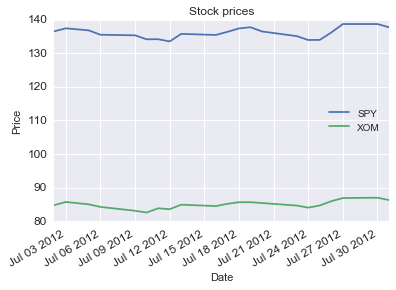

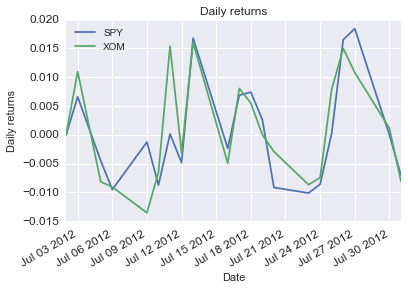

In [55]:
def compute_daily_returns(df):
    """Compute and return the daily return values."""
    # TODO: Your code here
    # Note: Returned DataFrame must have the same number of rows
    daily_returns = df.copy()
    daily_returns[1:] = (df[1:] / df[:-1].values) - 1 
    daily_returns.ix[0, :] = 0 
    return daily_returns
    
def test_run_daily_returns():
    # Read data
    dates = pd.date_range('2012-07-01', '2012-07-31')  # one month only
    symbols = ['SPY','XOM']
    df = get_data(symbols, dates)
    plot_data(df)

    # Compute daily returns
    daily_returns = compute_daily_returns(df)
    plot_data(daily_returns, title="Daily returns", ylabel="Daily returns")
    
test_run_daily_returns()

In [56]:
def fill_missing_values(df_data):
    """Fill missing values in data frame, in place."""
    df_data.fillna(method='ffill', inplace='TRUE')
    df_data.fillna(method='bfill', inplace='TRUE')


def test_filling():
    # Read data
    symbol_list = ["JAVA", "FAKE1", "FAKE2"]  # list of symbols
    start_date = "2005-12-31"
    end_date = "2014-12-07"
    dates = pd.date_range(start_date, end_date)  # date range as index
    df_data = get_data(symbol_list, dates)  # get data for each symbol

    # Fill missing values
    fill_missing_values(df_data)

    # Plot
    plot_data(df_data)

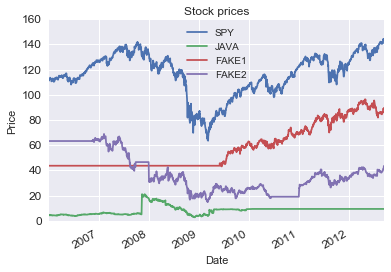

In [57]:
test_filling()

beta_XOM =  0.850746223673
alpha_XOM= -0.00024686727668


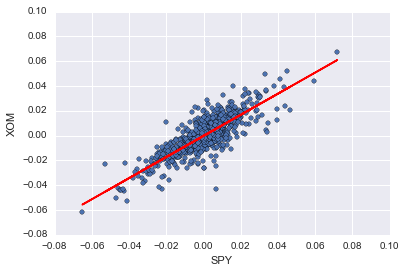

beta_GLD= 0.0597611348322
alpha_GLD= 0.00074788111616


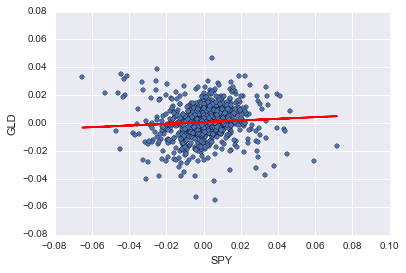

          SPY       XOM       GLD
SPY  1.000000  0.820241  0.067324
XOM  0.820241  1.000000  0.069687
GLD  0.067324  0.069687  1.000000


In [69]:
#scatter plot of covariance

def test_scatter():
    dates = pd.date_range('2009-01-01', '2012-12-31')
    symbols = ['SPY', 'XOM', 'GLD']
    df = get_data(symbols,dates)
    #plot_data(df)
    
    daily_returns = compute_daily_returns(df)
    #Scatter SPY vs XOM
    daily_returns.plot(kind='scatter', x='SPY', y ='XOM')
    beta_XOM, alpha_XOM = np.polyfit(daily_returns['SPY'], daily_returns['XOM'],1)
    print 'beta_XOM = ', beta_XOM
    print 'alpha_XOM=', alpha_XOM
    plt.plot(daily_returns['SPY'], beta_XOM*daily_returns['SPY'] + alpha_XOM, '-', color='r')
    plt.show()
    
    #Scatter SPY vs GLD
    daily_returns.plot(kind='scatter', x='SPY', y ='GLD')
    beta_GLD, alpha_GLD = np.polyfit(daily_returns['SPY'], daily_returns['GLD'],1)
    print 'beta_GLD=', beta_GLD
    print 'alpha_GLD=', alpha_GLD
    plt.plot(daily_returns['SPY'], beta_GLD*daily_returns['SPY'] + alpha_GLD, '-', color='r')
    plt.show()
    
    #plot_data(daily_returns, title = 'Daily Returns')
    #calculate pearson correlation
    print daily_returns.corr(method='pearson')
    
test_scatter()